In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\ethnicity.xlsx",index_col=False)

In [5]:
df1=df[['covid_cases','suicide_deaths']]

In [6]:
def clean_dataset(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [7]:
clean_dataset(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_12428\2934779625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,covid_cases,suicide_deaths
148,57721.0,6.8
152,134984.0,21.5
153,7803.0,42.7
160,11697.0,24.5
161,32028.0,34.1
...,...,...
926,10693.0,10.8
932,185099.0,18.9
937,22716.0,8.1
942,395323.0,15.4


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 148 to 946
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   covid_cases     181 non-null    float64
 1   suicide_deaths  181 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


In [9]:
# check the correlation(s) between variables
df1.corr().round(2)

,covid_cases,suicide_deaths
covid_cases,1.00,0.02
suicide_deaths,0.02,1.00


In [10]:
# Setting variables
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['covid_cases'].values.reshape(-1,1)
y = df1['suicide_deaths'].values.reshape(-1,1)

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

### 6. Interpreting Coefficients

In [14]:
# Print y-intercept. The intercept will be your B0 value
print('B0 value: ', regression.intercept_)

# Print the beta coefficients in same order as passed. Each coefficient will be the corresponding Beta for the X’s passed
print('beta coefficients(slope): ', regression.coef_) # how the y variable changes when X changes

# Zip can pair feature names and coeeficients together
zip(df['covid_cases'],regression.coef_)

B0 value:  [16.74962847]
beta coefficients(slope):  [[1.55263857e-07]]


### 7. Making predictions based on your model

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

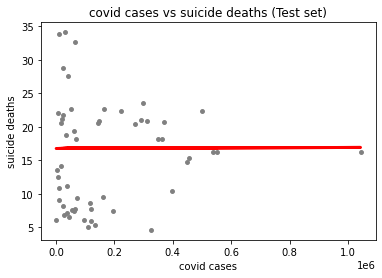

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('covid cases vs suicide deaths (Test set)')
plot_test.xlabel('covid cases')
plot_test.ylabel('suicide deaths')
plot_test.show()

### 8. Model Evaluation

In [17]:
# Create objects that contain the model summary statistics.

mae = mean_absolute_error(y_test, y_predicted) # This is the mean absolute error 
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [18]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
# take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.
print('Mean absolute error :', mae)
print('Mean squared error: ', rmse) # large number indicates that the regression line isn’t an accurate representation of the data
print('R2 score: ', r2) # values closer to 0 indicate a poor fit

Mean absolute error : 6.703024224351169
Mean squared error:  61.970234827425365
R2 score:  -0.020757106983174234


In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.5,16.750815
1,7.1,16.755523
2,9.4,16.760903
3,10.8,16.751289
4,7.4,16.759131
5,19.3,16.759265
6,18.1,16.760083
7,6.0,16.768047
8,7.7,16.768061
9,22.1,16.750602


### 9. Compare how the regression fits the training set

In [20]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.55263857e-07]]
Mean squared error:  84.65963786485312
R2 score:  1.6330340733783366e-05


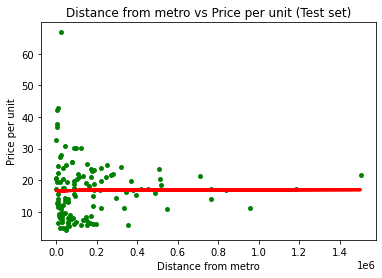

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()